In [1]:
using Random
using Distributions
using LinearAlgebra
using ForwardDiff
include("LowRankCov.jl")
include("LowRankBBVI-2.jl")
include("../Inversion/Plot.jl")
include("../Derivative-Free-Variational-Inference/MultiModal.jl")
Random.seed!(120);

dt = 0.02924660157067692


[ Info: ("iter = ", 50, " / ", 500)


dt = 0.03571428571428571

[ Info: ("iter = ", 100, " / ", 500)



dt = 0.03125


[ Info: ("iter = ", 150, " / ", 500)


dt = 0.027777777777777776

[ Info: ("iter = ", 200, " / ", 500)



dt = 0.025


[ Info: ("iter = ", 250, " / ", 500)


dt = 0.022727272727272728


[ Info: ("iter = ", 300, " / ", 500)


dt = 0.020833333333333332


[ Info: ("iter = ", 350, " / ", 500)


dt = 0.019230769230769232


[ Info: ("iter = ", 400, " / ", 500)


dt = 0.017857142857142856

[ Info: ("iter = ", 450, " / ", 500)



dt = 0.016666666666666666


[ Info: ("iter = ", 500, " / ", 500)


dt = 0.015963217138165127

[ Info: ("iter = ", 50, " / ", 500)



dt = 0.03237862094085624


[ Info: ("iter = ", 100, " / ", 500)


dt = 0.03125


[ Info: ("iter = ", 150, " / ", 500)


dt = 0.027777777777777776


[ Info: ("iter = ", 200, " / ", 500)


dt = 0.025


[ Info: ("iter = ", 250, " / ", 500)
[ Info: ("iter = ", 300, " / ", 500)


dt = 0.022727272727272728
dt = 0.020833333333333332


[ Info: ("iter = ", 350, " / ", 500)


dt = 0.019230769230769232


[ Info: ("iter = ", 400, " / ", 500)


dt = 0.017857142857142856


[ Info: ("iter = ", 450, " / ", 500)


dt = 0.016666666666666666


[ Info: ("iter = ", 500, " / ", 500)


dt = 0.013572280020367254

[ Info: ("iter = ", 50, " / ", 500)



dt = 0.06699860976774037


[ Info: ("iter = ", 100, " / ", 500)


dt = 0.038930164920565294


[ Info: ("iter = ", 150, " / ", 500)


dt = 0.01689322082500418

[ Info: ("iter = ", 200, " / ", 500)



dt = 0.03703392152570788


[ Info: ("iter = ", 250, " / ", 500)


dt = 0.012859890004331524


[ Info: ("iter = ", 300, " / ", 500)


dt = 0.0351914203120003

[ Info: ("iter = ", 350, " / ", 500)



dt = 0.019500608274632264


[ Info: ("iter = ", 400, " / ", 500)


dt = 0.009044968280997734


[ Info: ("iter = ", 450, " / ", 500)


dt = 0.0033988258420059605


[ Info: ("iter = ", 500, " / ", 500)


dt = 0.017646850045898988


[ Info: ("iter = ", 50, " / ", 500)


dt = 0.023363030971592414


[ Info: ("iter = ", 100, " / ", 500)


dt = 0.010795204415758923

[ Info: ("iter = ", 150, " / ", 500)



dt = 0.018740730485026582


[ Info: ("iter = ", 200, " / ", 500)


dt = 0.01180342645939907


[ Info: ("iter = ", 250, " / ", 500)


dt = 0.06677907251062618


[ Info: ("iter = ", 300, " / ", 500)


dt = 0.07426782033936931


[ Info: ("iter = ", 350, " / ", 500)


dt = 0.004699693778184523

[ Info: ("iter = ", 400, " / ", 500)



dt = 0.019062037331907162


[ Info: ("iter = ", 450, " / ", 500)


dt = 0.009573654041607158


[ Info: ("iter = ", 500, " / ", 500)


dt = 0.01387797380174941


[ Info: ("iter = ", 50, " / ", 500)


dt = 0.01809200181609473

[ Info: ("iter = ", 100, " / ", 500)



dt = 0.0625


[ Info: ("iter = ", 150, " / ", 500)


dt = 0.03985382831090867

[ Info: ("iter = ", 200, " / ", 500)



dt = 0.05


[ Info: ("iter = ", 250, " / ", 500)


dt = 0.045454545454545456

[ Info: ("iter = ", 300, " / ", 500)



dt = 0.041666666666666664


[ Info: ("iter = ", 350, " / ", 500)


dt = 0.038461538461538464


[ Info: ("iter = ", 400, " / ", 500)


dt = 0.03571428571428571


[ Info: ("iter = ", 450, " / ", 500)


dt = 0.03333333333333333


[ Info: ("iter = ", 500, " / ", 500)


dt = 0.015780224181230047


[ Info: ("iter = ", 50, " / ", 500)


dt = 0.033593341606908037


[ Info: ("iter = ", 100, " / ", 500)


dt = 0.0625

[ Info: ("iter = ", 150, " / ", 500)



dt = 0.05555555555555555


[ Info: ("iter = ", 200, " / ", 500)


dt = 0.05


[ Info: ("iter = ", 250, " / ", 500)


dt = 0.045454545454545456


[ Info: ("iter = ", 300, " / ", 500)


dt = 0.041666666666666664


[ Info: ("iter = ", 350, " / ", 500)


dt = 0.02944252689528861


[ Info: ("iter = ", 400, " / ", 500)


dt = 0.03571428571428571

[ Info: ("iter = ", 450, " / ", 500)



dt = 0.03333333333333333


[ Info: ("iter = ", 500, " / ", 500)


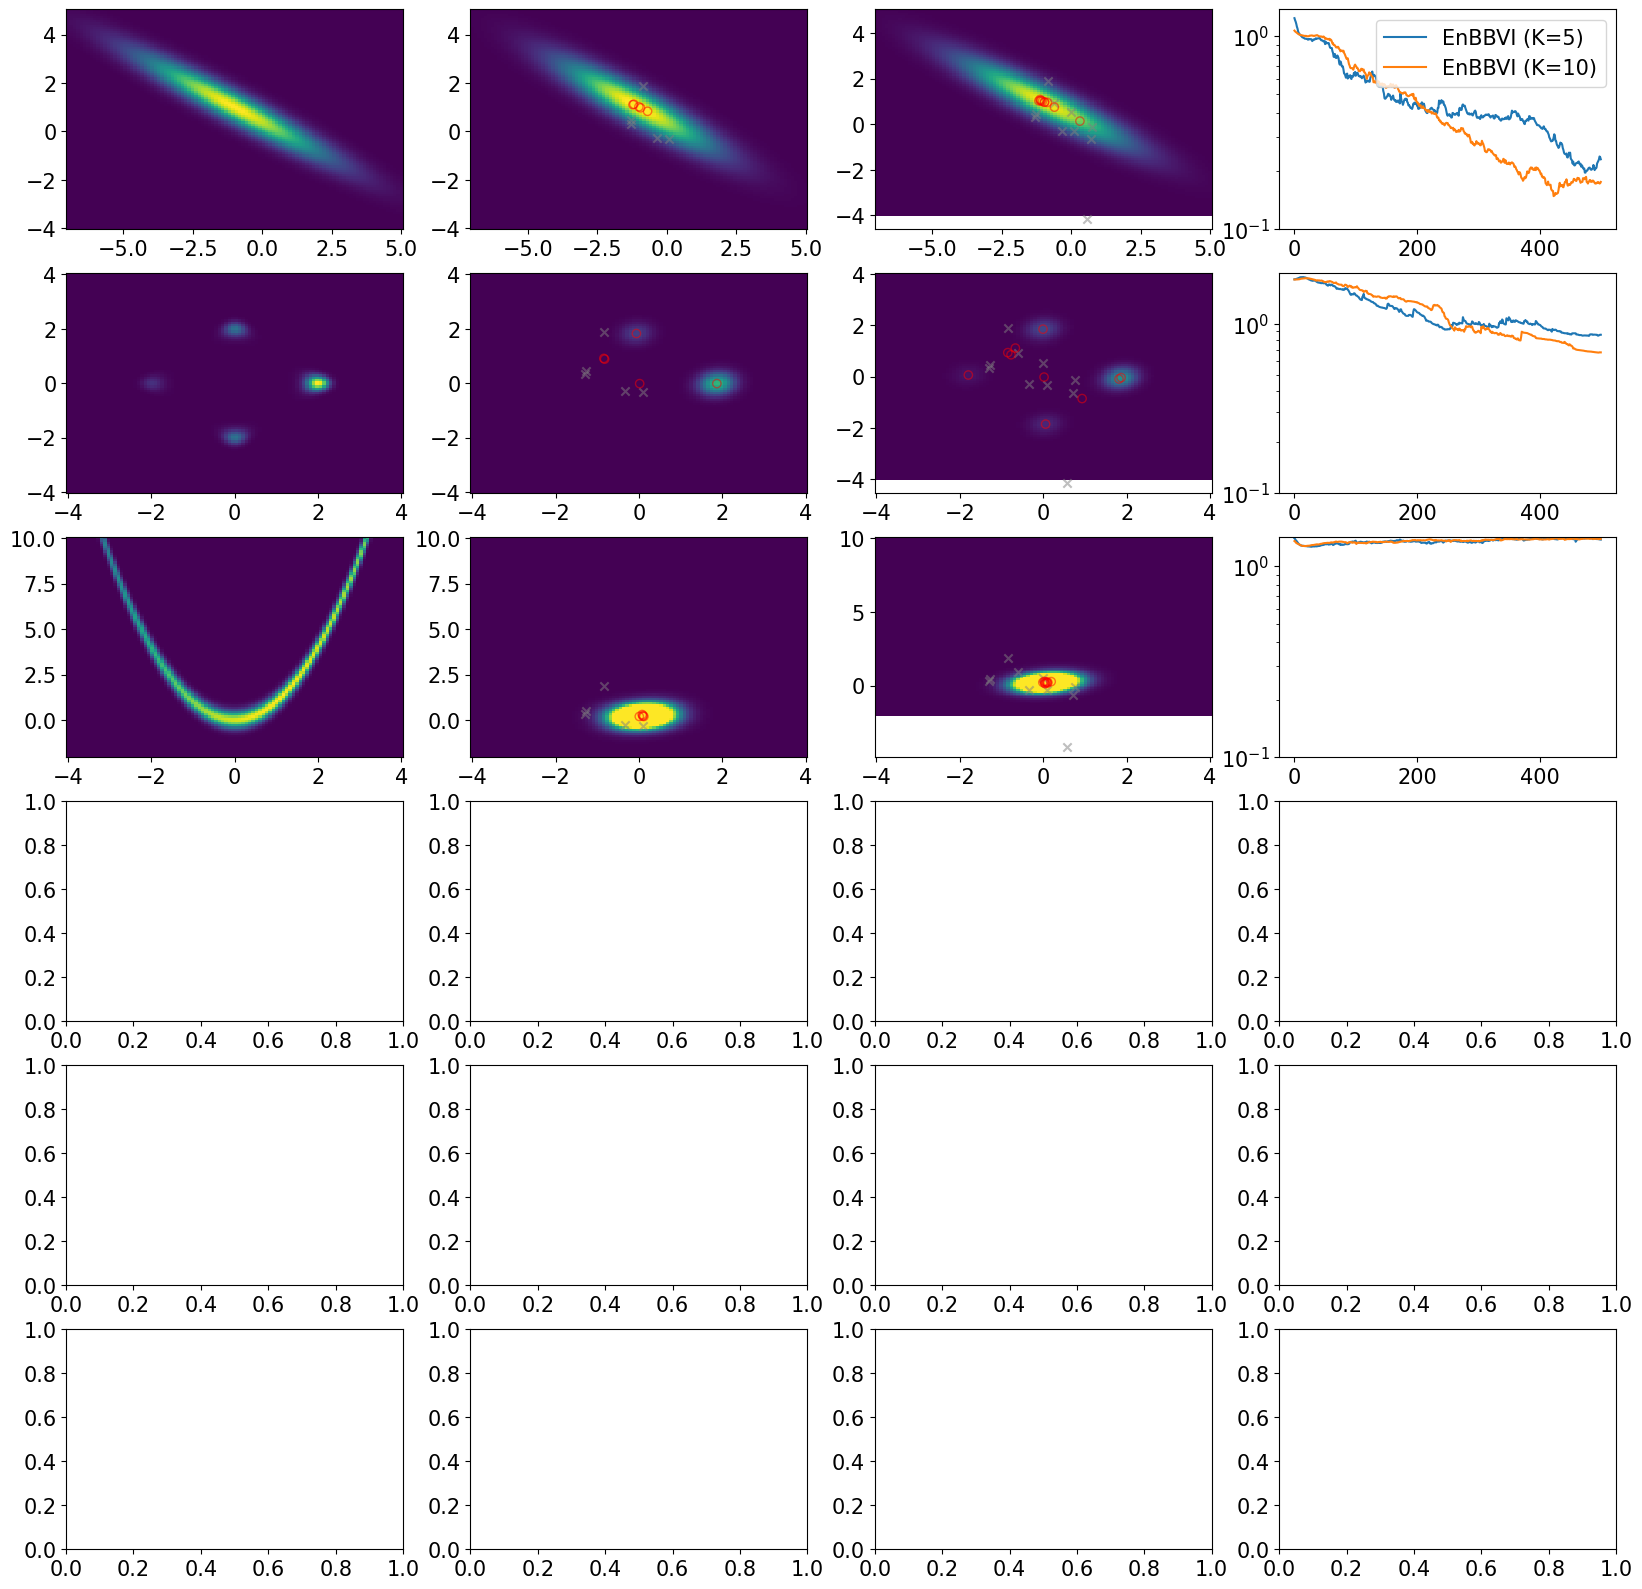

In [ ]:
N_modes_array = [5,10]
fig, ax = PyPlot.subplots(nrows=6, ncols=length(N_modes_array)+2, sharex=false, sharey=false, figsize=((length(N_modes_array)+2)*5,20))


N_modes = N_modes_array[end]
N_x = 20
N_r = 12
x0_w  = ones(N_modes)/N_modes
cov_eps0 = 0.2*ones(N_modes)
μ0, Σ0 = zeros(N_x), Diagonal(ones(N_x))
x0_mean, xx0_sqrt_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_r)
for im = 1:N_modes
    x0_mean[im, :] .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
    xx0_sqrt_cov[im, :, :] = 0.5*rand(N_x,N_r)/sqrt(N_r)
end

N_iter = 500
Nx, Ny = 100,100

ση = 1.0
Gtype = "Gaussian"
dt = 0.05
A = [1.0 1.0; 1.0 2.0]
y = [0.0; 1.0; zeros(N_x-2)]
func_args = (y, ση, A , Gtype)
func_F(x) = F(x, func_args)
func_Phi(x) = 0.5*norm(func_F(x))^2
objs1 = [Gaussian_mixture_EnBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:], cov_eps0[1:N_modes]; N_iter = N_iter, dt = dt, random_quadrature_type = "single_Gaussian")
        for N_modes in N_modes_array]
y_2d = y[1:2]
func_args = (y_2d, ση, A , Gtype)
func_F(x) = F(x, func_args)
PGM_visualization_2d(ax[1,:]; Nx = Nx, Ny = Ny, x_lim=[-7.0, 5.0], y_lim=[-4.0, 5.0], func_Phi=func_Phi, objs=objs1, label="EnBBVI")



ση = 1.0
dt = 0.2
Gtype = "Four_modes"
y = [4.2297; 4.2297; 0.5; 0.0; zeros(N_x-2)]
func_args = (y, ση, 0, Gtype)
func_F(x) = F(x, func_args)
func_Phi(x) = norm(func_F(x),2)^2/2
objs = [Gaussian_mixture_EnBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:], cov_eps0[1:N_modes]; N_iter = N_iter, dt = dt)
        for N_modes in N_modes_array]
y_2d = y[1:4]
func_args = (y_2d, ση, 0 , Gtype)
func_F(x) = F(x, func_args) 
PGM_visualization_2d(ax[2,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-4.0, 4.0], func_Phi=func_Phi, objs=objs)


ση = [sqrt(10.0);sqrt(10.0); ones(N_x-2)]
Gtype = "Banana"
dt = 0.1
λ = 10.0
y = [0.0; 1.0; zeros(N_x-2)]
func_args = (y, ση, λ , Gtype)
func_F(x) = F(x, func_args)
func_Phi(x) = norm(func_F(x),2)^2/2
μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
objs1 = [Gaussian_mixture_EnBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:], cov_eps0[1:N_modes]; N_iter = N_iter, dt = dt)
        for N_modes in N_modes_array]
y_2d, ση_2d = y[1:2], ση[1:2]
func_args = (y_2d, ση_2d, λ , Gtype)
func_F(x) = F(x, func_args)
PGM_visualization_2d(ax[3,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_Phi=func_Phi, objs=objs1)




# fig.tight_layout()
# fig.savefig("BBVI-GMD-Multimodal.pdf")
